In [1]:
# !pip install netCDF4
# !pip install cartopy
# !pip install basemap 


In [2]:
import netCDF4 as nc
import os

In [3]:
directories = ["Precipitation", "SEIO", "WTIO"]

In [4]:
import os
# Constructing a relative path to move one directory backward
data_relative_path = os.path.join('..', 'Data','CMIP6')
precipitation_path = os.path.join(data_relative_path,'Precipitation')
WTIO_path = os.path.join(data_relative_path,'WTIO')
SEIO_path = os.path.join(data_relative_path,'SEIO')
ds = nc.Dataset(f"{precipitation_path}/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_19811016-20101016_v20191108.nc")



[[[2.37280720e-08 2.46523342e-07 2.55435168e-07 ... 2.37233921e-09
   1.21468724e-09 3.62432018e-09]
  [1.59362230e-08 1.87298866e-07 1.49523231e-07 ... 2.21700382e-08
   1.00726973e-08 1.15827765e-08]
  [7.63402230e-09 4.52745258e-10 7.47316697e-09 ... 1.31438981e-07
   1.41872585e-08 6.31999164e-09]
  ...
  [4.88232290e-05 2.07393423e-05 1.08157483e-05 ... 1.51391441e-05
   1.69360010e-05 2.23780607e-05]
  [5.94781086e-05 1.95247230e-05 3.42549502e-05 ... 1.18601620e-05
   1.44003652e-05 7.04567492e-06]
  [6.72580354e-05 2.59889439e-05 3.43309694e-05 ... 1.07936985e-05
   1.15351877e-05 3.24278631e-06]]

 [[0.00000000e+00 0.00000000e+00 1.19928048e-13 ... 0.00000000e+00
   0.00000000e+00 6.76422682e-15]
  [0.00000000e+00 4.71460674e-12 5.65895768e-12 ... 0.00000000e+00
   0.00000000e+00 1.75681271e-19]
  [1.41115208e-09 9.52641743e-10 9.27801891e-10 ... 9.86403580e-12
   0.00000000e+00 4.50282146e-13]
  ...
  [7.50045865e-06 1.19100205e-05 1.53200817e-05 ... 8.51349398e-07
   3.07078

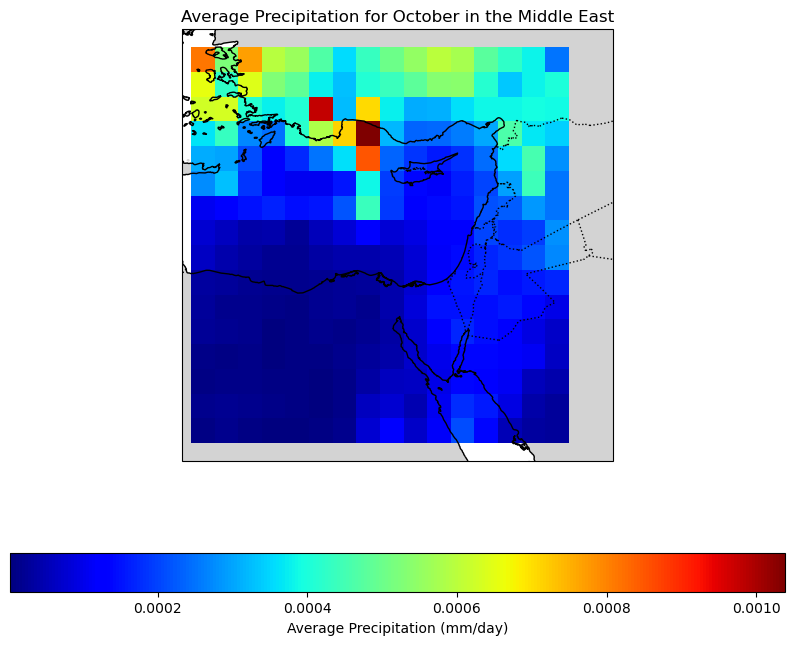

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

data = ds
pr_october = data.variables['pr'][:]
time = data.variables['time']
time_units = time.units
time_calendar = time.calendar

october_indices = np.array([i for i in range(len(time)) if nc.num2date(time[i], units=time_units, calendar=time_calendar).month == 10])
pr_october = pr_october[october_indices]
print(pr_october)
# Select the latitude and longitude range for the Middle East (25°N to 40°N, 25°E to 40°E)
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lat_indices = np.where((lat >= 25) & (lat <= 40))[0]
lon_indices = np.where((lon >= 25) & (lon <= 40))[0]

lat = lat[lat_indices]
lon = lon[lon_indices]
# pr_middle_east = pr_october[:, lat_indices][:, :, lon_indices]
pr_middle_east = pr_october[:, :, :]


# Calculate the average precipitation for each grid point
avg_pr_middle_east = np.sum(pr_middle_east, axis=0)

# Plot the map with the heatmap overlay
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([25, 40, 25, 40], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray')

plt.imshow(avg_pr_middle_east, origin='lower', cmap='jet', extent=[lon[0], lon[-1], lat[0], lat[-1]],
           transform=ccrs.PlateCarree(), interpolation='nearest')

# Add colorbar
cbar = plt.colorbar(label='Average Precipitation (mm/day)', orientation='horizontal')
cbar.set_label('Average Precipitation (mm/day)')

# Add title
plt.title('Average Precipitation for October in the Middle East')

plt.show()

